In [4]:
!pip install fancyimpute
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=aa5f8766a3ddfa0072924d402f06a43a36f8f62f5692b2901213bb21a82afd6b
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=71810f4b14b1fb1a0206f2ad07706b053c4cb4cf23daee5588a127806d3263a8
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [5]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [6]:
# read in data

raw_data = pd.read_csv('/content/Melanoma_GSE931.csv_PD_1.csv')
raw_data.tail()

<ipython-input-6-6703cc58a179>:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/content/Melanoma_GSE931.csv_PD_1.csv')


,Unnamed: 0,GSM2445716,GSM2445717,GSM2445718,GSM2445719,GSM2445720,GSM2445721,GSM2445722,GSM2445723,GSM2445724,...,GSM2445731,GSM2445732,GSM2445733,GSM2445734,GSM2445735,GSM2445736,GSM2445737,GSM2445738,GSM2445739,GSM2445740
56265,snoZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56266,snosnR66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56267,uc_338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56268,yR211F11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56269,Response,N,N,N,N,N,N,N,N,N,...,R,R,R,N,N,N,R,N,N,R


In [7]:
# some re-formatting

# rename column

raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)


# transpose so columns are genes and rows are patients
t_data = raw_data.set_index('patient').T
# t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK

t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)
# split data

labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])


(56270, 26)
(25, 56270)
(25, 56270)


In [8]:
print(clean_data.index)

Index(['GSM2445716', 'GSM2445717', 'GSM2445718', 'GSM2445719', 'GSM2445720',
       'GSM2445721', 'GSM2445722', 'GSM2445723', 'GSM2445724', 'GSM2445725',
       'GSM2445726', 'GSM2445727', 'GSM2445728', 'GSM2445729', 'GSM2445730',
       'GSM2445731', 'GSM2445732', 'GSM2445733', 'GSM2445734', 'GSM2445735',
       'GSM2445736', 'GSM2445737', 'GSM2445738', 'GSM2445739', 'GSM2445740'],
      dtype='object')


In [9]:
# drop any genes with > 90% missing data


clean_data= clean_data.dropna(thresh = clean_data.shape[0]*0.9, axis=1)
print(clean_data.shape)


(25, 717)


In [10]:
# drop genes with >80% 0 input
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

(25, 717)


In [11]:
clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')


In [12]:
col_var = clean_data_numeric.var()
print(col_var.idxmax())
print(col_var.max())

S100A7
24.01667723344217


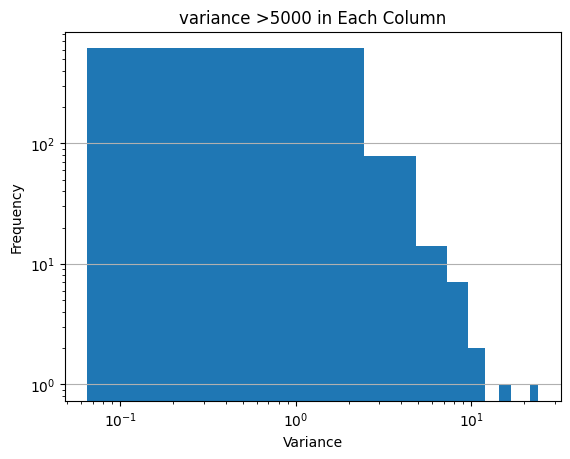

In [13]:
plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('variance >5000 in Each Column')
plt.grid(axis='y')
plt.show()

In [14]:
top_100_var = col_var.nlargest(100)
top_100_var.to_csv("_GSE931_top_100_var.csv")

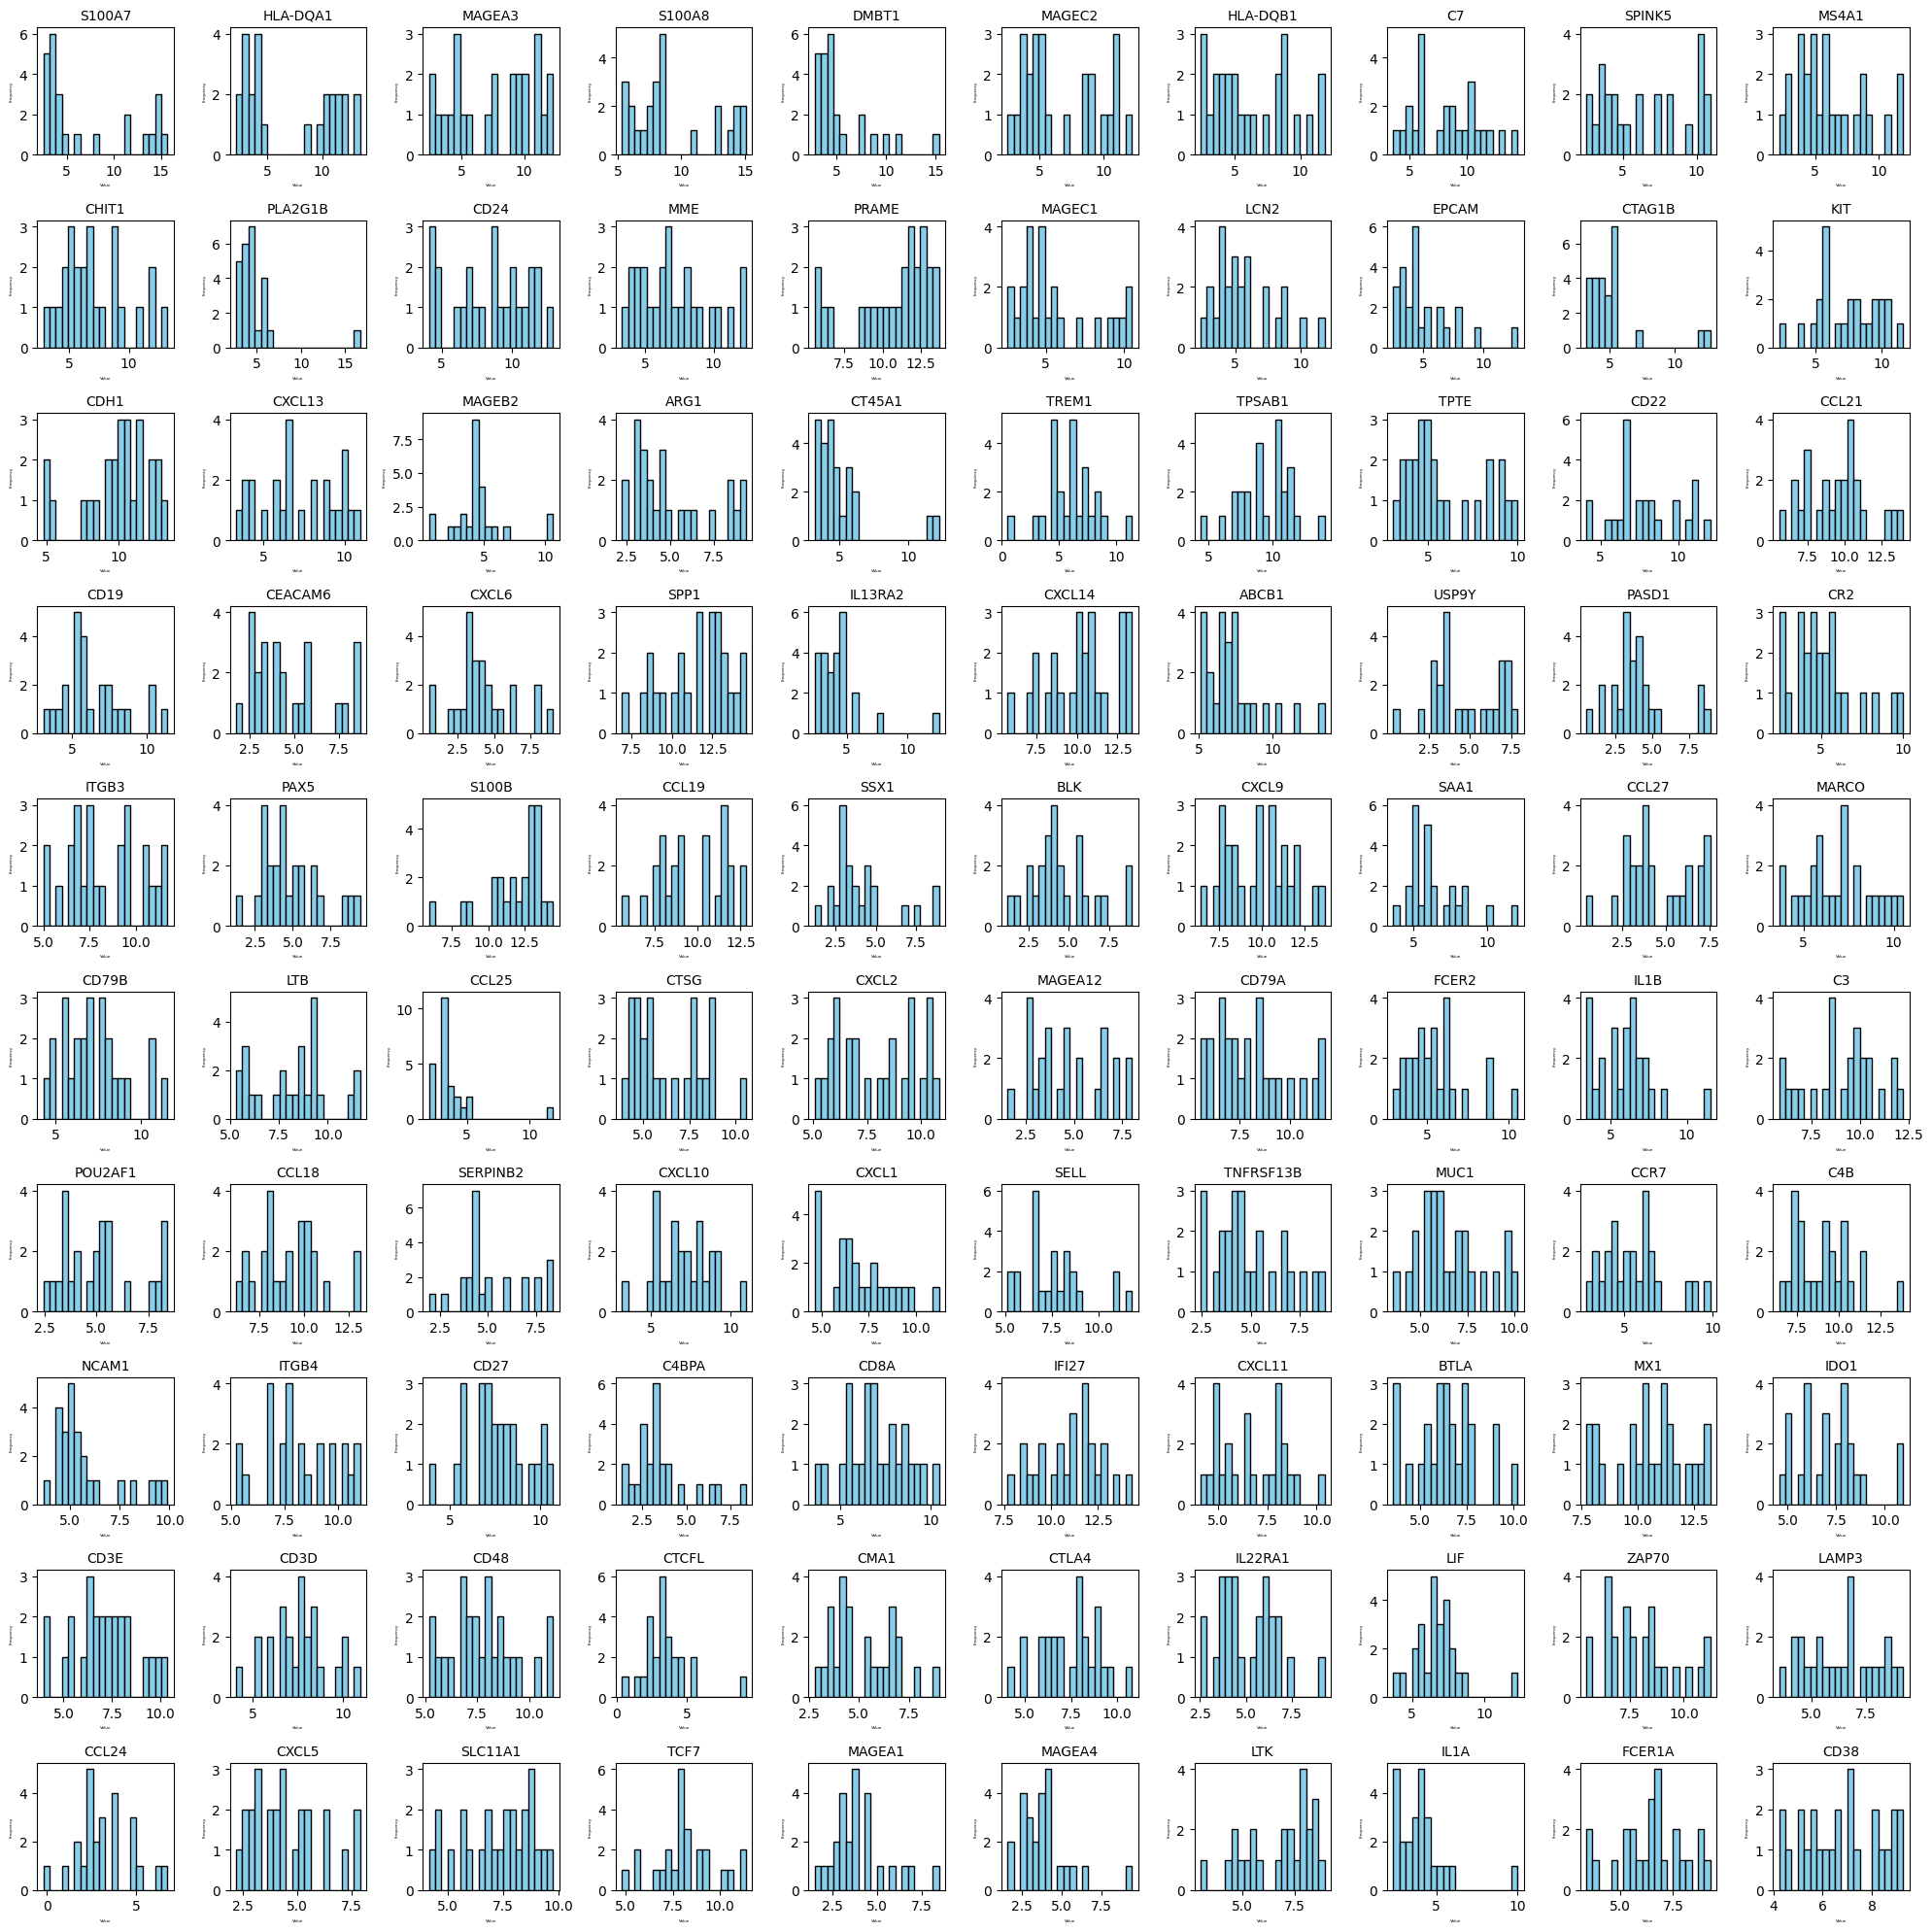

In [15]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]

    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')

    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)


plt.tight_layout()

plt.show()

In [16]:
top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

patient        S100A7   HLA-DQA1     MAGEA3     S100A8      DMBT1     MAGEC2  \
GSM2445716   8.445089   9.742933   7.629642   8.203200   2.810883  12.168190   
GSM2445717   3.335118  10.294292   2.849691   6.458500   2.849691   2.527763   
GSM2445718  13.917280   3.191914  11.604937  14.242248   7.669961   9.032017   
GSM2445719   2.743730   4.106300  12.302697   8.086122   2.936375   5.521337   
GSM2445720   4.055370   2.552869   3.775262   7.661394  10.092028   3.775262   
GSM2445721   2.628866   3.043903   3.043903   5.329306   3.851258   3.628866   
GSM2445722   4.879054  10.285046   4.879054   7.171836   5.257566   5.142088   
GSM2445723   3.036951   3.621913   9.221826   7.394503   8.552650   4.358879   
GSM2445724   3.452395   2.921880   4.452395   6.144272   3.999883   4.751955   
GSM2445725  14.595153   3.513802  10.821231  14.001039   4.651306   8.909551   
GSM2445726  13.153504   8.529170   2.425300  12.737300   3.577303   3.255375   
GSM2445727   3.459439  11.470666  11.065

In [17]:
# z-score transformation (for PCA)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(top_100_var_data)

scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()
print(scaled_data.shape)

(25, 100)


In [18]:
# export data

# normalized version of above^ (for PCA)
scaled_data.to_csv('GSE931_scaled_top_100.csv')

# true labels (response y/n)
labels.to_csv('GSE931_labels.csv')